In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
from sklearn.impute import SimpleImputer
import seaborn as sns

In [ ]:
df= pd.read_csv("3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv")
#print(df)

In [ ]:
df.head(100)

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Main Supervising District,Release Type,Release type: Paroled to Detainder united,Part of Target Population,Recidivism - Return to Prison numeric
0,2010,2013,White - Non-Hispanic,Under 25,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Burglary,5JD,Parole,Parole,Yes,1
3,2010,2013,White - Non-Hispanic,55 and Older,C Felony,Drug,Trafficking,8JD,Parole,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,25-34,D Felony,Drug,Trafficking,3JD,Parole,Parole,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,4JD,Parole,Parole,Yes,1
96,2010,2013,White - Non-Hispanic,45-54,Felony - Enhanced,Property,Theft,5JD,Parole,Parole,Yes,1
97,2010,2013,White - Non-Hispanic,Under 25,C Felony,Violent,Sex,8JD,Special Sentence,Special Sentence,Yes,1
98,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Burglary,1JD,Parole,Parole,Yes,1


In [ ]:
data = df.drop(['Fiscal Year Released','Recidivism Reporting Year'],axis='columns')
data.head(100)

,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Main Supervising District,Release Type,Release type: Paroled to Detainder united,Part of Target Population,Recidivism - Return to Prison numeric
0,White - Non-Hispanic,Under 25,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1
1,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1
2,White - Non-Hispanic,25-34,D Felony,Property,Burglary,5JD,Parole,Parole,Yes,1
3,White - Non-Hispanic,55 and Older,C Felony,Drug,Trafficking,8JD,Parole,Parole,Yes,1
4,Black - Non-Hispanic,25-34,D Felony,Drug,Trafficking,3JD,Parole,Parole,Yes,1
...,...,...,...,...,...,...,...,...,...,...
95,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,4JD,Parole,Parole,Yes,1
96,White - Non-Hispanic,45-54,Felony - Enhanced,Property,Theft,5JD,Parole,Parole,Yes,1
97,White - Non-Hispanic,Under 25,C Felony,Violent,Sex,8JD,Special Sentence,Special Sentence,Yes,1
98,White - Non-Hispanic,25-34,D Felony,Property,Burglary,1JD,Parole,Parole,Yes,1


In [ ]:
data [['Race','a','b']] = data["Race - Ethnicity"].apply(lambda x:pd.Series(str(x).split("-"))) #split one into  columns
data['Ethnicity']=data["a"]+data["b"] #combine 2 columns into 1 column
data=data.drop(["Race - Ethnicity","a","b"],axis='columns') #axis = columns or 1
data.head(200)

,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Main Supervising District,Release Type,Release type: Paroled to Detainder united,Part of Target Population,Recidivism - Return to Prison numeric,Race,Ethnicity
0,Under 25,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1,White,NonHispanic
1,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1,White,NonHispanic
2,25-34,D Felony,Property,Burglary,5JD,Parole,Parole,Yes,1,White,NonHispanic
3,55 and Older,C Felony,Drug,Trafficking,8JD,Parole,Parole,Yes,1,White,NonHispanic
4,25-34,D Felony,Drug,Trafficking,3JD,Parole,Parole,Yes,1,Black,NonHispanic
...,...,...,...,...,...,...,...,...,...,...,...
195,Under 25,D Felony,Public Order,Weapons,7JD,Parole,Parole,Yes,1,White,NonHispanic
196,Under 25,D Felony,Property,Burglary,8JD,Parole,Parole,Yes,1,White,NonHispanic
197,Under 25,C Felony,Drug,Trafficking,5JD,Parole,Parole,Yes,1,White,NonHispanic
198,35-44,Felony - Enhanced,Violent,Assault,2JD,Parole,Parole,Yes,1,White,NonHispanic


In [ ]:
data=data.drop(["Ethnicity","Release Type"],axis='columns')
data

,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Main Supervising District,Release type: Paroled to Detainder united,Part of Target Population,Recidivism - Return to Prison numeric,Race
0,Under 25,D Felony,Violent,Assault,4JD,Parole,Yes,1,White
1,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Yes,1,White
2,25-34,D Felony,Property,Burglary,5JD,Parole,Yes,1,White
3,55 and Older,C Felony,Drug,Trafficking,8JD,Parole,Yes,1,White
4,25-34,D Felony,Drug,Trafficking,3JD,Parole,Yes,1,Black
...,...,...,...,...,...,...,...,...,...
26015,25-34,C Felony,Violent,Murder/Manslaughter,NaN,Discharged End of Sentence,Yes,0,White
26016,25-34,D Felony,Property,Vandalism,5JD,Paroled to Detainer,No,0,White
26017,Under 25,Aggravated Misdemeanor,Violent,Other Violent,1JD,Discharged End of Sentence,Yes,0,Black
26018,Under 25,D Felony,Drug,Other Drug,5JD,Parole,No,0,White


In [ ]:
data['Race'].unique()

array(['White ', 'Black ', 'American Indian or Alaska Native ',
       'Asian or Pacific Islander ', 'N/A ', 'nan'], dtype=object)

In [ ]:
data['Race'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
26015    False
26016    False
26017    False
26018    False
26019    False
Name: Race, Length: 26020, dtype: bool

In [ ]:
data=data.replace(['nan','N/A '],np.NaN)

In [ ]:
m=data["Race"].mode()[0]
m

'White '

In [ ]:
data["Race"].fillna(m,inplace=True)

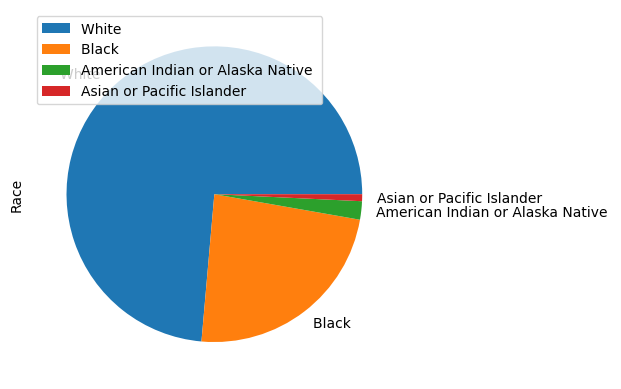

In [ ]:
data.Race.value_counts().plot(kind='pie').legend()
plt.legend(loc='best')

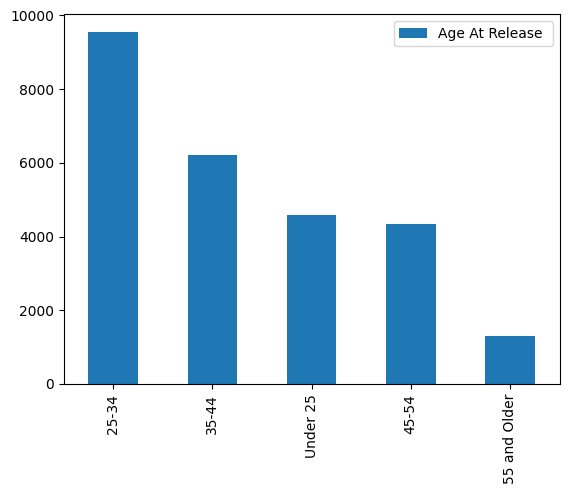

In [ ]:
data["Age At Release "].value_counts().plot(kind='bar').legend()
plt.legend(loc='best')

In [ ]:
data.dtypes

Age At Release                               object
Convicting Offense Classification            object
Convicting Offense Type                      object
Convicting Offense Subtype                   object
Main Supervising District                    object
Release type: Paroled to Detainder united    object
Part of Target Population                    object
Recidivism - Return to Prison numeric         int64
Race                                         object
dtype: object

In [ ]:
data.ffill(inplace=True) 

<function matplotlib.pyplot.show(close=None, block=None)>

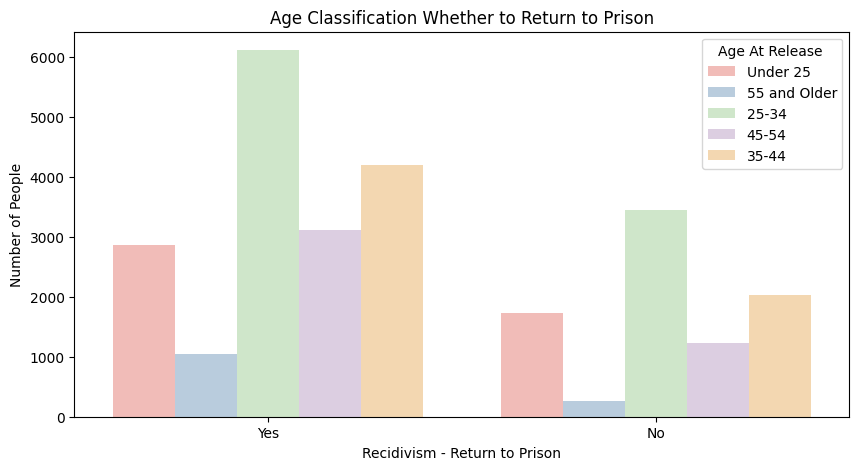

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Recidivism - Return to Prison numeric', hue='Age At Release ',data=data, palette="Pastel1", )
plt.xticks([0, 1], ['Yes', 'No'])
plt.title("Age Classification Whether to Return to Prison")
plt.xlabel('Recidivism - Return to Prison')
plt.ylabel('Number of People')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

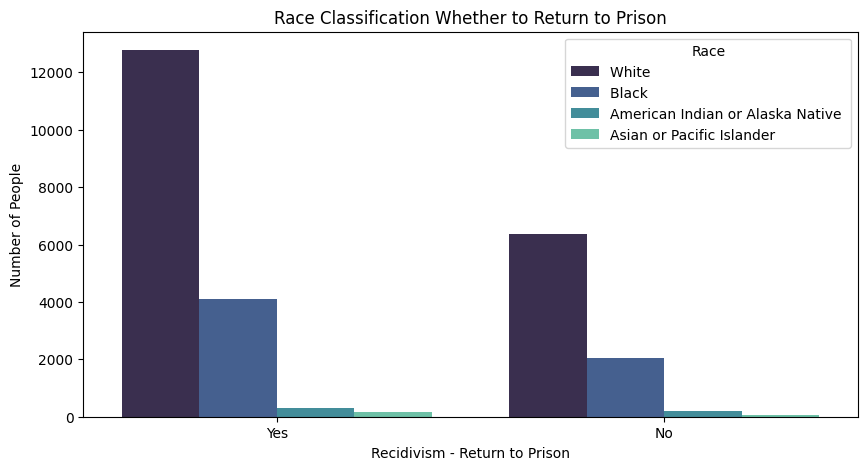

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Recidivism - Return to Prison numeric', hue='Race',data=data, palette="mako")
plt.xticks([0, 1], ['Yes', 'No'])
plt.title("Race Classification Whether to Return to Prison")
plt.xlabel('Recidivism - Return to Prison')
plt.ylabel('Number of People')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

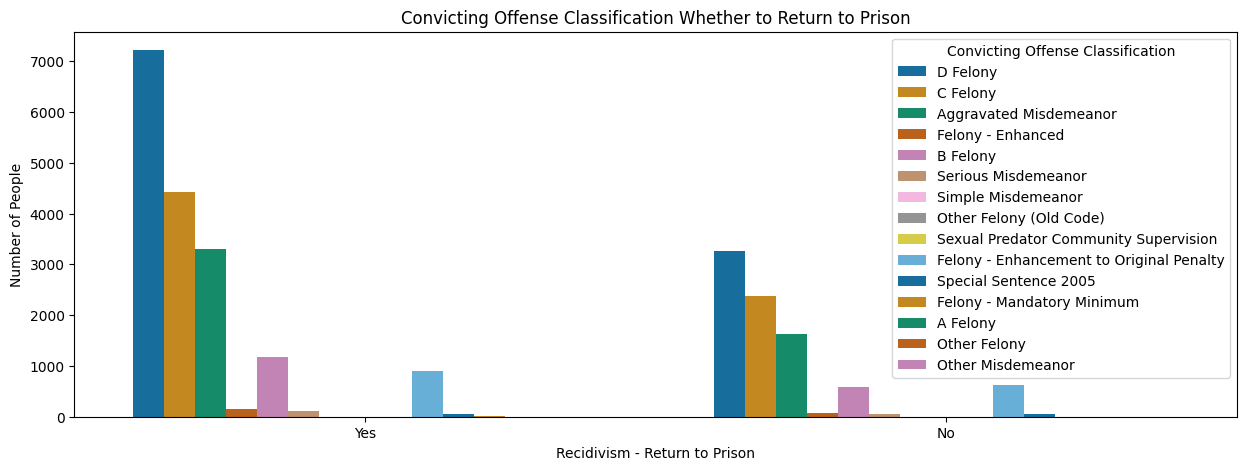

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Recidivism - Return to Prison numeric', hue='Convicting Offense Classification',data=data, palette="colorblind")
plt.xticks([0, 1], ['Yes', 'No'])
plt.title("Convicting Offense Classification Whether to Return to Prison")
plt.xlabel('Recidivism - Return to Prison')
plt.ylabel('Number of People')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

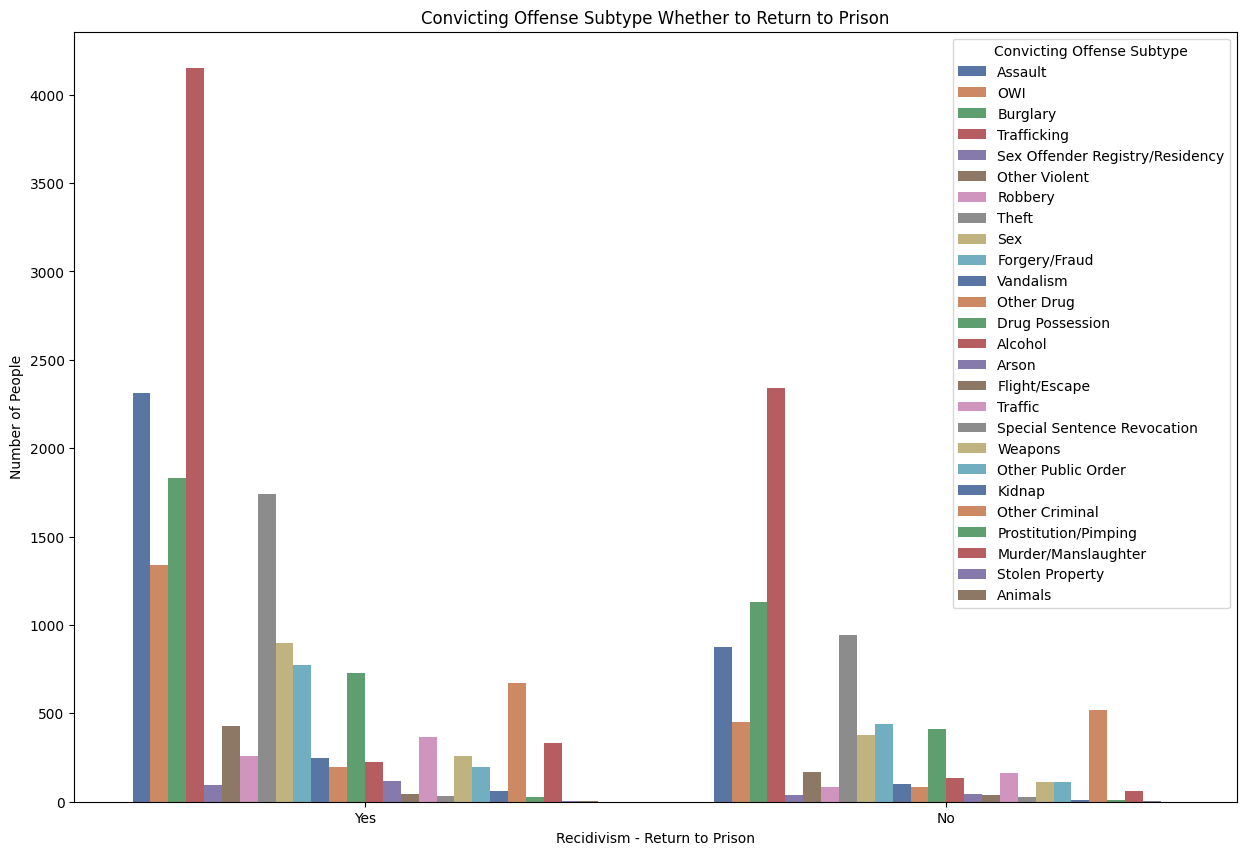

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Recidivism - Return to Prison numeric', hue='Convicting Offense Subtype',data=data, palette="deep")
plt.xticks([0, 1], ['Yes', 'No'])
plt.title("Convicting Offense Subtype Whether to Return to Prison")
plt.xlabel('Recidivism - Return to Prison')
plt.ylabel('Number of People')

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

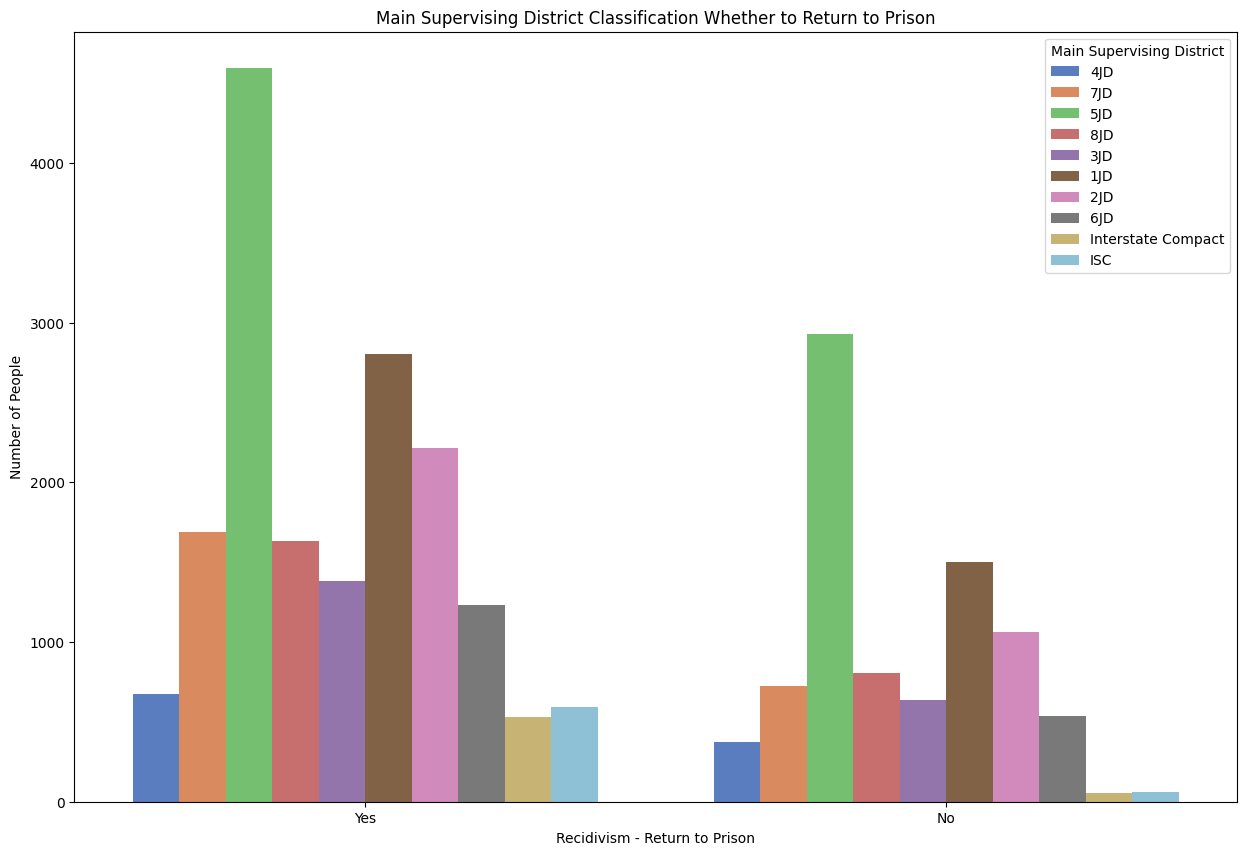

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Recidivism - Return to Prison numeric', hue='Main Supervising District',data=data, palette="muted")
plt.xticks([0, 1], ['Yes', 'No'])
plt.title("Main Supervising District Classification Whether to Return to Prison")
plt.xlabel('Recidivism - Return to Prison')
plt.ylabel('Number of People')

plt.show


## **Change dataset to numeric dataset**

In [ ]:
data.dtypes

Age At Release                               object
Convicting Offense Classification            object
Convicting Offense Type                      object
Convicting Offense Subtype                   object
Main Supervising District                    object
Release type: Paroled to Detainder united    object
Part of Target Population                    object
Recidivism - Return to Prison numeric         int64
Race                                         object
dtype: object

In [ ]:
data['Race'].unique()

array(['White ', 'Black ', 'American Indian or Alaska Native ',
       'Asian or Pacific Islander '], dtype=object)

In [ ]:
data['Age At Release '].unique()

array(['Under 25', '55 and Older', '25-34', '45-54', '35-44'],
      dtype=object)

In [ ]:
data['Convicting Offense Classification'].unique()

array(['D Felony', 'C Felony', 'Aggravated Misdemeanor',
       'Felony - Enhanced', 'B Felony', 'Serious Misdemeanor',
       'Simple Misdemeanor', 'Other Felony (Old Code)',
       'Sexual Predator Community Supervision',
       'Felony - Enhancement to Original Penalty',
       'Special Sentence 2005', 'Felony - Mandatory Minimum', 'A Felony',
       'Other Felony', 'Other Misdemeanor'], dtype=object)

In [ ]:
data['Convicting Offense Type'].unique()

array(['Violent', 'Public Order', 'Property', 'Drug', 'Other'],
      dtype=object)

In [ ]:
data['Convicting Offense Subtype'].unique()

array(['Assault', 'OWI', 'Burglary', 'Trafficking',
       'Sex Offender Registry/Residency', 'Other Violent', 'Robbery',
       'Theft', 'Sex', 'Forgery/Fraud', 'Vandalism', 'Other Drug',
       'Drug Possession', 'Alcohol', 'Arson', 'Flight/Escape', 'Traffic',
       'Special Sentence Revocation', 'Weapons', 'Other Public Order',
       'Kidnap', 'Other Criminal', 'Prostitution/Pimping',
       'Murder/Manslaughter', 'Stolen Property', 'Animals'], dtype=object)

In [ ]:
data['Release type: Paroled to Detainder united'].unique()

array(['Parole', 'Discharged End of Sentence', 'Special Sentence',
       'Paroled to Detainer'], dtype=object)

In [ ]:
data['Part of Target Population'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data['Main Supervising District'].unique()

array(['4JD', '7JD', '5JD', '8JD', '3JD', '1JD', '2JD', '6JD',
       'Interstate Compact', 'ISC'], dtype=object)

In [ ]:
race_mapping={'White ':1, 'Black ':2, 'American Indian or Alaska Native ':3,'Asian or Pacific Islander ':4}
age_mapping ={'Under 25':5, '55 and Older':6, '25-34':7, '45-54':8, '35-44':9}
classification_mapping={'D Felony':10, 'C Felony':11, 'Aggravated Misdemeanor':12,
       'Felony - Enhanced':13, 'B Felony':14, 'Serious Misdemeanor':15,
       'Simple Misdemeanor':16, 'Other Felony (Old Code)':17,
       'Sexual Predator Community Supervision':18,
       'Felony - Enhancement to Original Penalty':19,
       'Special Sentence 2005':20, 'Felony - Mandatory Minimum':21, 'A Felony':22,
       'Other Felony':23, 'Other Misdemeanor':24}
convtype_mapping={'Violent':25, 'Public Order':26, 'Property':27, 'Drug':28, 'Other':29}
convsubtype_mapping={'Assault':30, 'OWI':31, 'Burglary':32, 'Trafficking':33,
       'Sex Offender Registry/Residency':34, 'Other Violent':35, 'Robbery':36,
       'Theft':37, 'Sex':38, 'Forgery/Fraud':39, 'Vandalism':40, 'Other Drug':41,
       'Drug Possession':42, 'Alcohol':43, 'Arson':44, 'Flight/Escape':45, 'Traffic':46,
       'Special Sentence Revocation':47, 'Weapons':48, 'Other Public Order':49,
       'Kidnap':50, 'Other Criminal':51, 'Prostitution/Pimping':52,
       'Murder/Manslaughter':53, 'Stolen Property':54, 'Animals':55}
detained_mapping={'Parole':56, 'Discharged End of Sentence':57, 'Special Sentence':58,
       'Paroled to Detainer':59}
main_mapping={'4JD':60, '7JD':61, '5JD':62, '8JD':63, '3JD':64, '1JD':65, '2JD':66, '6JD':67,
       'Interstate Compact':68, 'ISC':69}
target_mapping={'Yes':70, 'No':71}

data['Race']=data['Race'].map(race_mapping)
data['Age At Release ']=data['Age At Release '].map(age_mapping)
data['Convicting Offense Classification']=data['Convicting Offense Classification'].map(classification_mapping)
data['Convicting Offense Type']=data['Convicting Offense Type'].map(convtype_mapping)
data['Convicting Offense Subtype']=data['Convicting Offense Subtype'].map(convsubtype_mapping)
data['Release type: Paroled to Detainder united']=data['Release type: Paroled to Detainder united'].map(detained_mapping)
data['Main Supervising District']=data['Main Supervising District'].map(main_mapping)
data['Part of Target Population']=data['Part of Target Population'].map(target_mapping)
data

,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Main Supervising District,Release type: Paroled to Detainder united,Part of Target Population,Recidivism - Return to Prison numeric,Race
0,5,10,25,30,60,56,70,1,1
1,6,10,26,31,61,56,70,1,1
2,7,10,27,32,62,56,70,1,1
3,6,11,28,33,63,56,70,1,1
4,7,10,28,33,64,56,70,1,2
...,...,...,...,...,...,...,...,...,...
26015,7,11,25,53,61,57,70,0,1
26016,7,10,27,40,62,59,71,0,1
26017,5,12,25,35,65,57,70,0,2
26018,5,10,28,41,62,56,71,0,1


In [ ]:
data.dtypes

Age At Release                               int64
Convicting Offense Classification            int64
Convicting Offense Type                      int64
Convicting Offense Subtype                   int64
Main Supervising District                    int64
Release type: Paroled to Detainder united    int64
Part of Target Population                    int64
Recidivism - Return to Prison numeric        int64
Race                                         int64
dtype: object

## **Prediction using SVM**

In [ ]:
X = data.drop("Recidivism - Return to Prison numeric", axis='columns')
y = data["Recidivism - Return to Prison numeric"] #to predict y using X
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
# Fit the model
svc.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [ ]:
y_preds = svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
y_test

7683     1
10196    0
3826     1
3522     0
24230    0
        ..
11142    0
15801    0
9335     0
25554    0
14604    0
Name: Recidivism - Return to Prison numeric, Length: 7806, dtype: int64

In [ ]:
svc.score(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.6663555506753047

In [ ]:
svc.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.6664104534973098

In [ ]:
corr_matrix=data.corr()

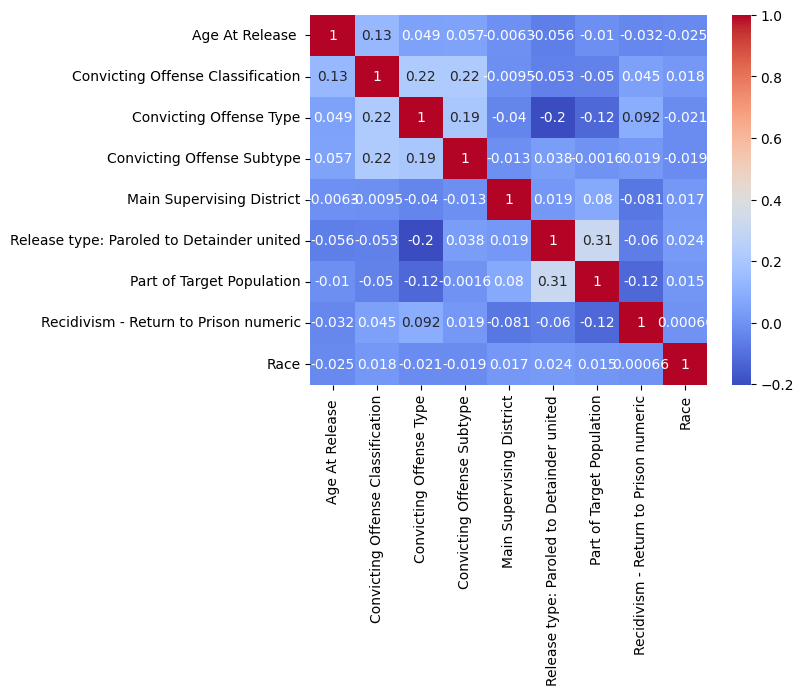

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      5202
           1       0.00      0.00      0.00      2604

    accuracy                           0.67      7806
   macro avg       0.33      0.50      0.40      7806
weighted avg       0.44      0.67      0.53      7806



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
